In [3]:
!pip install attention

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
#데이터
from tensorflow.keras.datasets import reuters, imdb

from attention import Attention


RNN(순환신경망)

In [38]:
#하이퍼 파라미터 설정
vocab_size = 10000 #어휘 사전 크기
max_len = 200 # sequence 최대 길이
embedding_dim = 32 #임베딩 (문자 >> 숫자) 차원
batch_size = 64 #배치 크기
epochs = 5 #학습 횟수

#데이터 가져오기
(x_train, y_train) , (x_test, y_test) = imdb.load_data(num_words=vocab_size)


In [39]:
type(x_train)

numpy.ndarray

In [40]:
print(x_train[0]) #빈도수

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [41]:
print(type(x_train[0]))

<class 'list'>


In [42]:
print(y_train[:10]) # 긍/부정 데이터

[1 0 0 1 0 0 1 0 1 0]


In [43]:
sequence.pad_sequences(x_train, maxlen=200)
#0의 의미 >> zero-padding (입력으로 들어갈 단어의 전체 길이를 200으로 맞추기 위함)

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [44]:
sequence.pad_sequences(x_test, maxlen=200)


array([[   0,    0,    0, ...,   14,    6,  717],
       [1987,    2,   45, ...,  125,    4, 3077],
       [4468,  189,    4, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    0,    0, ..., 2302,    7,  470],
       [   0,    0,    0, ...,   34, 2005, 2643]], dtype=int32)

In [45]:
#sequence padding

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [46]:
x_train

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [47]:
#모델 생성(RNN)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len)) # 10000, 32차원
model.add(SimpleRNN(64, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# return_sequences=False
'''
RNN 계층 전체 sequence 대한 학습을 수행, 처리한 후. 마지막 time step 출력만 다음 층(next layer)전달
즉, 최종상태(context vector 문맥 벡터)를 기반으로 분류

# return_sequences=True
각 time step 출력 반환.
즉 모든 time step 출력 반환, 다음 rnn계층이 입력으로 사용
rnn 계층을 여러 개 쌓을때 활용
'''

'\nRNN 계층 전체 sequence 대한 학습을 수행, 처리한 후. 마지막 time step 출력만 다음 층(next layer)전달\n즉, 최종상태(context vector 문맥 벡터)를 기반으로 분류 \n\n# return_sequences=False\n각 time step 출력 반환.\n즉 모든 time step 출력 반환, 다음 rnn계층이 입력으로 사용\nrnn 계층을 여러 개 쌓을때 활용 \n'

In [48]:
#모델 컴파일 (학습 환경 설정)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [49]:
#학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [50]:
#모델 학습 (fi/ train data만)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test),
                    callbacks=[early_stopping_callback])

Epoch 1/5
391/391 [==============================] - 114s 285ms/step - loss: 0.5967 - accuracy: 0.6502 - val_loss: 0.5415 - val_accuracy: 0.7303
Epoch 2/5
391/391 [==============================] - 87s 222ms/step - loss: 0.5165 - accuracy: 0.7549 - val_loss: 0.6129 - val_accuracy: 0.6678
Epoch 3/5
391/391 [==============================] - 78s 198ms/step - loss: 0.3582 - accuracy: 0.8460 - val_loss: 0.3770 - val_accuracy: 0.8471
Epoch 4/5
391/391 [==============================] - 84s 214ms/step - loss: 0.2789 - accuracy: 0.8880 - val_loss: 0.4614 - val_accuracy: 0.7900
Epoch 5/5
391/391 [==============================] - 82s 210ms/step - loss: 0.4910 - accuracy: 0.7646 - val_loss: 0.6071 - val_accuracy: 0.6605


In [51]:
#결과 출력
print('텍스트 정확도: %.4f' %(model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 14s 18ms/step - loss: 0.6071 - accuracy: 0.6605
텍스트 정확도: 0.6605


LSTM(로이터 뉴스 카테고리 분류)

In [67]:
#데이터 가져오기
(x_train, y_train), (x_test, y_test) = \
reuters.load_data(num_words = 1000, test_split=0.2)
#num_words=1000 빈도수가 큰 것을 기준으로 구분된 1000개, train/test 비율 80 / 20

In [53]:
x_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 2,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 2,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [54]:
#데이터 확인
ca = np.max(y_train) + 1 # 45 + 1 = 46 (index가 0으로 시작하기 때문)
print(ca, '종류')
print(len(x_train), '학습용 뉴스기사')
print(len(x_test), '평가용 뉴스기사')


46 종류
8982 학습용 뉴스기사
2246 평가용 뉴스기사


In [68]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [56]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   2   8  43
  10 447   5  25 207 270   5   2 111  16 369 186  90  67   7  89   5  19
 102   6  19 124  15  90  67  84  22 482  26   7  48   4  49   8 864  39
 209 154   6 151   6  83  11  15  22 155  11  15   7  48   9   2   2 504
   6 258   6 272  11  15  22 134  44  11  15  16   8 197   2  90  67  52
  29 209  30  32 132   6 109  15  17  12]


In [57]:
print(y_train)


[ 3  4  3 ... 25  3 25]


In [69]:
#원핫 인코딩 전처리
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [59]:
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [70]:
#모델 구조
model = Sequential()
model.add(Embedding(1000, 100))
#Embedding('불러온 단어의 총수','기사당 단어수')
model.add(LSTM(100, activation='tanh'))
#LSTM >> tanh
model.add(Dense(46, activation='softmax'))
# 46 카테고리로 분류 (다중분류)

In [71]:
#모델 실행
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
#학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [75]:
history = model.fit(x_train, y_train, batch_size=20, epochs=200, validation_data=(x_test, y_test),
          callbacks = [early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 23s 51ms/step - loss: 1.5319 - accuracy: 0.6091 - val_loss: 1.5927 - val_accuracy: 0.6064
Epoch 2/200
450/450 [==============================] - 7s 16ms/step - loss: 1.3852 - accuracy: 0.6432 - val_loss: 1.4423 - val_accuracy: 0.6394
Epoch 3/200
450/450 [==============================] - 5s 10ms/step - loss: 1.2653 - accuracy: 0.6828 - val_loss: 1.3560 - val_accuracy: 0.6652
Epoch 4/200
450/450 [==============================] - 6s 14ms/step - loss: 1.1891 - accuracy: 0.7001 - val_loss: 1.3009 - val_accuracy: 0.6861
Epoch 5/200
450/450 [==============================] - 4s 9ms/step - loss: 1.0781 - accuracy: 0.7326 - val_loss: 1.2806 - val_accuracy: 0.6932
Epoch 6/200
450/450 [==============================] - 4s 9ms/step - loss: 1.0058 - accuracy: 0.7478 - val_loss: 1.2274 - val_accuracy: 0.6977
Epoch 7/200
450/450 [==============================] - 4s 10ms/step - loss: 0.9263 - accuracy: 0.7664 - val_loss: 1.1872 - val_accuracy: 

In [76]:
#결과 출력
print('텍스트 정확도: %.4f' %(model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 0s 5ms/step - loss: 1.2712 - accuracy: 0.7133
텍스트 정확도: 0.7133


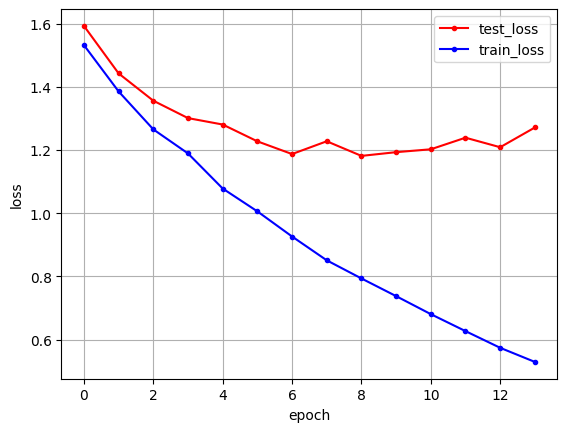

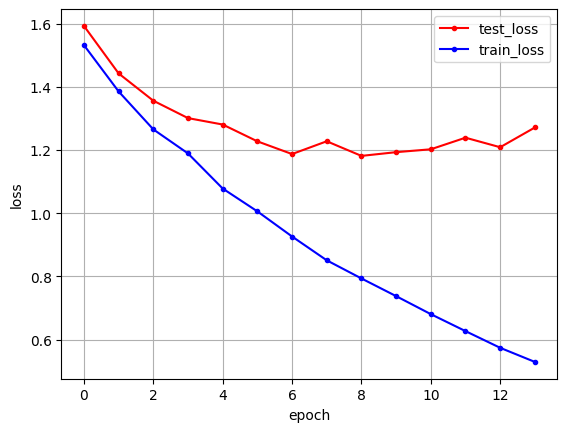

In [77]:
# 데이터 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show(0)


LSTM / CNN 조합 >> imdb 영화 리뷰분류

In [105]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

In [106]:
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

print(x_train[0])
print(x_test[0])



[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [107]:
#모델 구조 설정
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
#CNN (Conv1D)
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
# padding='valid' >> zero-padding 없이 convolution 통과한 출력값 사용
model.add(MaxPooling1D(pool_size=4))
# pool_size =4 >> 4개 값 중 최대값 추출 (차원 축소)

#LSTM
model.add(LSTM(50))
#LSTM 50 unit 개수

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 100)         500000    
                                                                 
 dropout_4 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, None, 64)          0         
 g1D)                                                            
                                                                 
 lstm_9 (LSTM)               (None, 50)                23000     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                     

In [ ]:
'''
(1) embedding_2 (Embedding)
vocab_size * embedding_dim
5000 * 100 = 500000

(2) dropout (Dropout)
무작위 네트워크 끔 (변화없음)

(3) conv1d (Conv1D)
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
출력 특징수 64
커널 크기 5 > 1차원
입력 채널수 100
(5 * 1) * 100 * 64 + 64(bias) = 32064

(4) maxpooling1d (MaxPooling1D)
pool_size 4 차원축소 (변화없음)

(5) lstm (LSTM)
유닛개수(lstm cell의 개수) 50
입력특징수 (입력되는 데이터 차원수) 64
파라미터 수
4 * ((입력특징 수 + 유닛 개수 + 1) * 유닛개수)
4 * ( 64 + 50 + 1 ) * 50 = 23000
>> LSTM이 4개의 gate (forget gate, input gate, output gate, cell state)(입력, 출력, 망각, 기억)를 가짐

(6) dense (Dense)
50 * 1 + 1(bias) = 51
'''

In [108]:
#모델 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
#학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [110]:
history = model.fit(x_train, y_train, batch_size=40, epochs=100, validation_split=0.25,
          callbacks = [early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 43s 87ms/step - loss: 0.4164 - accuracy: 0.7937 - val_loss: 0.2845 - val_accuracy: 0.8821
Epoch 2/100
469/469 [==============================] - 15s 33ms/step - loss: 0.2393 - accuracy: 0.9073 - val_loss: 0.2631 - val_accuracy: 0.8894
Epoch 3/100
469/469 [==============================] - 12s 27ms/step - loss: 0.1838 - accuracy: 0.9308 - val_loss: 0.2714 - val_accuracy: 0.8899
Epoch 4/100
469/469 [==============================] - 11s 24ms/step - loss: 0.1478 - accuracy: 0.9469 - val_loss: 0.2855 - val_accuracy: 0.8882
Epoch 5/100
469/469 [==============================] - 9s 17ms/step - loss: 0.1256 - accuracy: 0.9555 - val_loss: 0.3267 - val_accuracy: 0.8835


In [111]:
#결과 출력
print('텍스트 정확도: %.4f' %(model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 4s 5ms/step - loss: 0.3531 - accuracy: 0.8693
텍스트 정확도: 0.8693


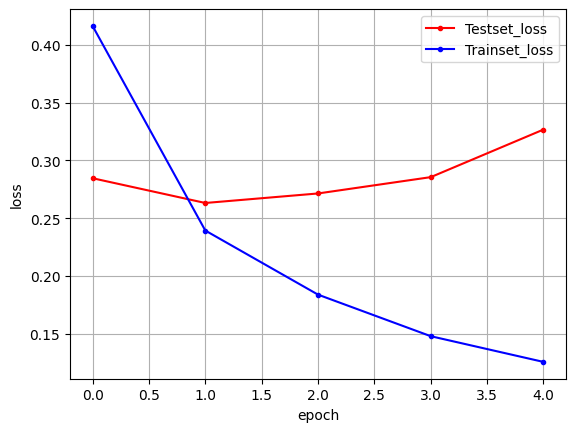

In [112]:
# 데이터 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

어텐션을 사용한 신경망

In [113]:
#모델 구조 재설정

model = Sequential()
model.add(Embedding(5000,500))
model.add(Dropout(0.5))

#lstm 64유닛개수
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 500)         2500000   
                                                                 
 dropout_5 (Dropout)         (None, None, 500)         0         
                                                                 
 lstm_10 (LSTM)              (None, None, 64)          144640    
                                                                 
 attention (Attention)       (None, 128)               20480     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2665249 (10.17 MB)
Trainable params: 26

In [ ]:
'''
(1) embedding_2 (Embedding)
vocab_size * embedding_dim
5000 * 500 = 2500000

(2) dropout (Dropout)
무작위 네트워크 끔 (변화없음)

(3) lstm (LSTM)
유닛개수(lstm cell의 개수) 64
입력특징수 (입력되는 데이터 차원수) 500
4 * (64 + 500 + 1) * 64 = 144640

(4) attention (Attention)
파라미터 수=(입력 차원+출력 차원)×출력 차원×3
입력 차원 64
출력차원 128


'''


In [114]:
# 모델 실행 옵션 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 조기종료 옵션 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
# 모델 실행
history = model.fit(x_train,y_train, batch_size=40, epochs=200, validation_data=(x_test, y_test),
          callbacks=[early_stopping_callback])
#테스트 정확도 출력
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

Epoch 1/200
625/625 [==============================] - 77s 119ms/step - loss: 0.3739 - accuracy: 0.8266 - val_loss: 0.3047 - val_accuracy: 0.8776
Epoch 2/200
625/625 [==============================] - 42s 67ms/step - loss: 0.2175 - accuracy: 0.9139 - val_loss: 0.2739 - val_accuracy: 0.8847
Epoch 3/200
625/625 [==============================] - 36s 58ms/step - loss: 0.1613 - accuracy: 0.9378 - val_loss: 0.2913 - val_accuracy: 0.8795
Epoch 4/200
625/625 [==============================] - 29s 47ms/step - loss: 0.1144 - accuracy: 0.9558 - val_loss: 0.3381 - val_accuracy: 0.8854
Epoch 5/200
625/625 [==============================] - 26s 41ms/step - loss: 0.0828 - accuracy: 0.9692 - val_loss: 0.3727 - val_accuracy: 0.8774
Epoch 6/200
625/625 [==============================] - 23s 36ms/step - loss: 0.0569 - accuracy: 0.9794 - val_loss: 0.5258 - val_accuracy: 0.8788
Epoch 7/200
782/782 [==============================] - 8s 10ms/step - loss: 0.5505 - accuracy: 0.8760

 테스트 정확도: 0.8760


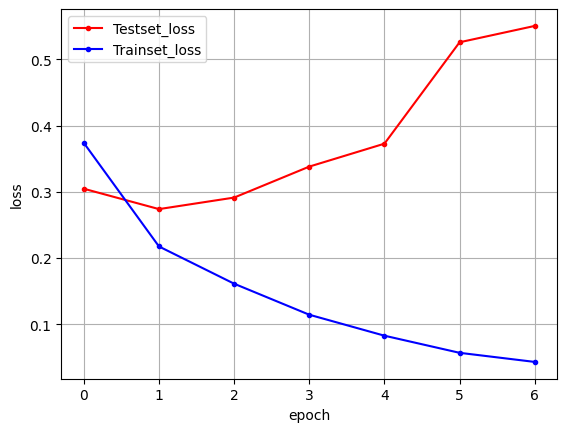

In [115]:
# 데이터 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()